In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

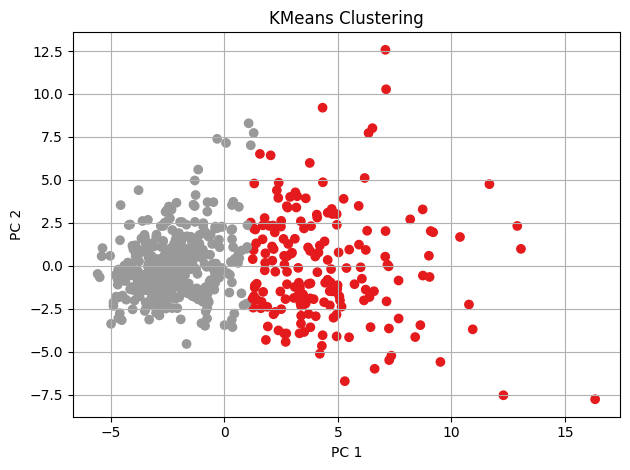

In [3]:
x=pd.read_csv(r'WBCD - WBCD.csv').drop(['id','diagnosis'],axis=1)

x_scaled=StandardScaler().fit_transform(x)
clusters=KMeans(n_clusters=2,random_state=42).fit_predict(x_scaled)
x_pca=PCA(n_components=2).fit_transform(x_scaled)
plt.scatter(x_pca[:, 0],x_pca[:, 1],c=clusters,cmap='Set1')
plt.title('KMeans Clustering')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.grid(True)
plt.tight_layout()
plt.show()


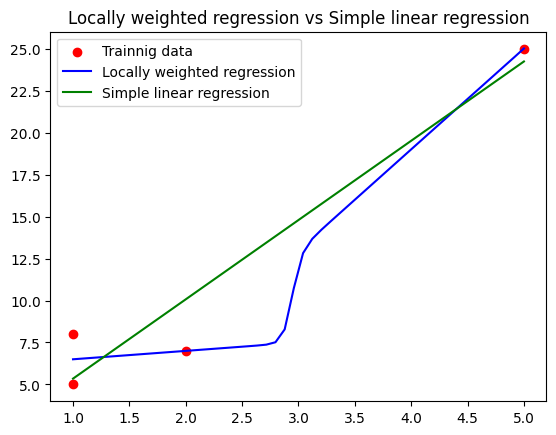

In [7]:
import numpy as np 
import matplotlib.pyplot as plt

def lwr(x_train,y_train,x_test,tau):
    weights=np.exp(-((x_test-x_train)**2)/(2*tau**2))
    W=np.diag(weights)
    X=np.c_[np.ones(len(x_train)),x_train]
    beta=np.linalg.inv(X.T @ W @ X ) @ X.T @ W @ y_train
    return beta[0]+beta[1]*x_test

x_train=np.array([5,1,2,1])
y_train=np.array([25,5,7,8,])
x_test_vals=np.linspace(x_train.min(),x_train.max(),50)
tau=0.4

lwr_preds=[lwr(x_train,y_train,x,tau) for x in x_test_vals]

X=np.c_[np.ones(len(x_train)),x_train]
beta=np.linalg.inv(X.T @ X ) @ X.T @ y_train
slr_preds= beta[0]+beta[1]*x_test_vals

plt.scatter(x_train,y_train,color='red',label='Trainnig data')
plt.plot(x_test_vals,lwr_preds,label='Locally weighted regression',color='blue')
plt.plot(x_test_vals,slr_preds,label='Simple linear regression',color='green')
plt.title('Locally weighted regression vs Simple linear regression')
plt.legend()
plt.show()

